<a href="https://colab.research.google.com/github/GM1-DEVIANTS/unsupervised-predict-streamlit-template/blob/master/new_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Movie Recommendation System

© Explore Data Science Academy
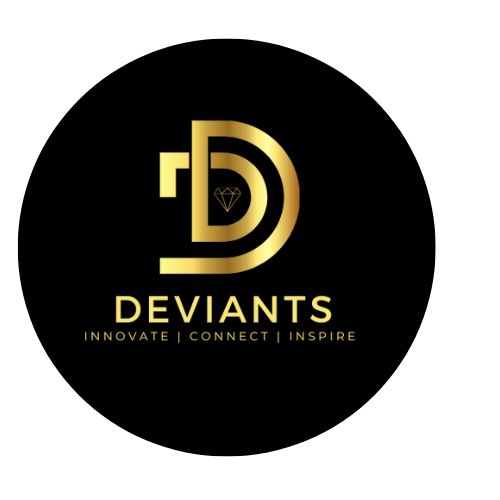

---
### Honour Code

We {**GM1_DEVIANTS**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### EDSA 2201 & 2207 unsupervised Learning hackathon

. . .
EDSA Honour Code.pdf



Defination * Unsupervised

## **PROJECT OVERVIEW:  MOVIE RECOMMENDATION SYSTEM**


In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.
The team was tasked to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

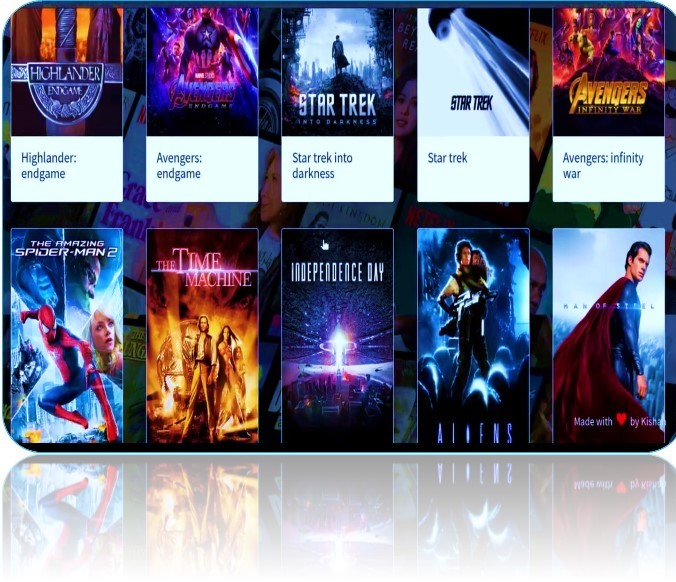



## **PROBLEM STATEMENT**

The main objective of this project is to design the system that has a provision for user to select attributes on which he wants the movie to be recommended. This will be achieved using collaborative filtering based systems (CF based systems):Collaborative filtering system recommends items based on similarity measures between users and/or items. The system recommends items preferred by similar users. This is based on the scenario where a person asks his friends, who have similar tastes, to recommend him some movies. We selected this method because it is dependent on the relation between users which implies that it is content-independent. CF recommender systems can suggest serendipitous items by observing similar-minded people’s behavior. They can make real quality assessment of items by considering other peoples experience.The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.


## **Dataset Description**

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data and resampled for fair evaluation purposes.

### Supplied Files
* genome_scores.csv - A score mapping the strength between movies and tag-related properties.
* genome_tags.csv - User assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### Additional Information
The below information is provided directly from the MovieLens dataset description files:

### Ratings Data File Structure (train.csv)
All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

`userId,movieId,rating,timestamp`

The lines within this file are ordered first by userId, then, within the user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### Tags Data File Structure (tags.csv)
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

`userId,movieId,tag,timestamp`

The lines within this file are ordered first by userId, then, within the user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag are determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

### Movies Data File Structure (movies.csv)
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

`movieId,title,genres`

Movie titles are entered manually or imported from https://www.themoviedb.org/ and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

### Links Data File Structure (links.csv)
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

`movieId,imdbId,tmdbId`

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

### Tag Genome (genome-scores.csv and genome-tags.csv)
As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

`movieId,tagId,relevance`

The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

`tagId,tag`

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#seven>8. References</a>

<a id="one"></a>
<code style="background:red;color:black"> 
## **1. Importing packages**</code><a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [4]:
# Install packages here
!pip install git+https://github.com/ProfHercules/Surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ProfHercules/Surprise to /tmp/pip-req-build-zc59ul83
  Running command git clone -q https://github.com/ProfHercules/Surprise /tmp/pip-req-build-zc59ul83
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp37-cp37m-linux_x86_64.whl size=1665315 sha256=10033dc6521c1eabad143c7e9d6f5b8efe760b909e64e4b81ec9260b624257fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-oa6mjiic/wheels/2c/72/4c/60c99571e35e6fbc52bc5de9f31810b2f1d447bf26a7ccdfc5
Successfully built scikit-surprise


In [5]:

# Packages for data processing
import numpy as np
import pandas as pd

import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import BaselineOnly
import heapq
from wordcloud import WordCloud

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<code style="background:red;color:black">

## **2. Loading datasets**</code><a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In [6]:
! pip install -q kaggle

from google.colab import  files
files.upload()

#Create Kaggle Folder
!mkdir ~/.kaggle
#Copy Kaggle.json file to new folder
! cp kaggle.json ~/.kaggle/
#Grant Permissions
! chmod 600  ~/.kaggle/kaggle.json
#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           7589        258  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2673        110  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          17508        504  1.0              
sameepvani/nasa-nearest-earth-objects                     NAS

In [7]:
#Download dataset
! kaggle competitions download -c edsa-movie-recommendation-2022

 97% 233M/239M [00:10<00:00, 20.2MB/s]
100% 239M/239M [00:10<00:00, 23.6MB/s]


In [8]:
 !unzip  edsa-movie-recommendation-2022.zip

Archive:  edsa-movie-recommendation-2022.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


In [9]:

genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
movies= pd.read_csv('movies.csv')
train=pd.read_csv('train.csv')
genome_scores = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

<code style="background:red;color:black">

## **3. Exploratory Data Analysis (EDA)**</code><a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


Exploratory data analysis (EDA) is a state of mind, a way of thinking about the data analysis and doing it. EDA emphasises using the visual display to reveal vital information about the examined data. EDA has been used to examine the distribution shape or the relationship between two variables; the aim is to overcome the problems identified by elementary techniques `(Hartwig & Dearing 1979, pp4-7)`.

Checking the shape of the datasets 

# NON GRAPHICAL EDA

EXPLORING THE DATASETS 

In [10]:
print('train data:',train.shape) 
print('test data:',test.shape)
print('tags data:', tags.shape)
print("Movies data:",movies.shape)
print('links data:',links.shape)
print('imdb data:',imdb.shape)
print('genome tags data:',genome_tags.shape)
print('genome scores data:',genome_scores.shape)

train data: (10000038, 4)
test data: (5000019, 2)
tags data: (1093360, 4)
Movies data: (62423, 3)
links data: (62423, 3)
imdb data: (27278, 6)
genome tags data: (1128, 2)
genome scores data: (15584448, 3)


Creating a DataFrame which would outline the sizes of our data

In [11]:

D_F = ['train', 'test', 'tags', 'imdb','links', 'movies', 'genome_tags', 'genome_scores']

size = [len(train), len(test), len(tags),
         len(imdb), len(links), len(movies),
         len(genome_tags), len(genome_scores)]
total_size = pd.DataFrame(list(zip(D_F, size)),
                             columns=['datasets', 'size'])
total_size

,datasets,size
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb,27278
4,links,62423
5,movies,62423
6,genome_tags,1128
7,genome_scores,15584448


checking for missing values

In [16]:
def data_overview_display(dataframe_list,column_names=[]):

    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True) 

In [18]:
train_null = pd.DataFrame(train.isnull().sum())
test_null = pd.DataFrame(test.isnull().sum())
movies_null = pd.DataFrame(movies.isnull().sum())
links_null = pd.DataFrame(links.isnull().sum())
imdb_null = pd.DataFrame(imdb.isnull().sum())
tags_null = pd.DataFrame(tags.isnull().sum())
genome_tags_null = pd.DataFrame(genome_tags.isnull().sum())
genome_scores_null = pd.DataFrame(genome_scores.isnull().sum())


In [19]:
# To enable us view the full value of dataframe
pd.set_option('display.max_colwidth', -1)     

# View the first 5 entries in each dataset
print('TRAIN DATA TABLE'), display(train.head())
print('MOVIES DATA TABLE'), display(movies.head())
print('IMDB DATA TABLE'), display(imdb.head())
print('TAG DATA TABLE'), display(tags.head())

TRAIN DATA TABLE


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


MOVIES DATA TABLE


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


IMDB DATA TABLE


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


TAG DATA TABLE


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


(None, None)

In [32]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [33]:

df_major = pd.merge(train, movies, on='movieId')

In [34]:
#number of unique movies
movies = movies['movieId'].unique().tolist()
len(movies)

62423

In [ ]:
#minimum rating given to a m
train['rating'].min() 

In [35]:
#extracting the year from the title
df_major['year'] = df_major.title.str.extract('(\(\d\d\d\d\))',expand=False)
#removing the parenthesis
df_major['year'] = df_major.year.str.extract('(\d\d\d\d)',expand=False)

In [36]:
#ratings grouped by year
most_rated = df_major.groupby('year').size().sort_values(ascending=False)[:25]
most_rated.head(25)

year
1995    598412
1994    521621
1999    450391
1996    444231
2000    386359
1997    372869
1993    371445
2001    360392
1998    357105
2002    327004
2004    320147
2003    288276
2006    234793
2007    220578
2005    213926
2008    207086
1992    195852
2009    194451
1989    192823
1990    191930
2010    177888
1991    167436
1988    149527
1987    148957
1986    148295
dtype: int64

In [37]:
#top 25 most rated movies
most_rated = df_major.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Shawshank Redemption, The (1994)                                                  32831
Forrest Gump (1994)                                                               32383
Pulp Fiction (1994)                                                               31697
Silence of the Lambs, The (1991)                                                  29444
Matrix, The (1999)                                                                29014
Star Wars: Episode IV - A New Hope (1977)                                         27560
Jurassic Park (1993)                                                              25518
Schindler's List (1993)                                                           24004
Braveheart (1995)                                                                 23722
Fight Club (1999)                                                                 23536
Terminator 2: Judgment Day (1991)                                                 23075
Toy Story (1995)          

In [38]:
#most watched movies
ad = df_major.groupby('title', as_index=False)['rating'].count().sort_values(['rating'], ascending=False).rename(columns={'rating':'Timeswatched'})
ad

,title,Timeswatched
34480,"Shawshank Redemption, The (1994)",32831
14537,Forrest Gump (1994),32383
31236,Pulp Fiction (1994),31697
34840,"Silence of the Lambs, The (1991)",29444
25144,"Matrix, The (1999)",29014
...,...,...
25997,Mniejsze zło (2009),1
25992,Mixed Blood (1984),1
25991,Mitä meistä tuli (2009),1
25988,Mitch Albom's For One More Day (2007),1


In [39]:
#most watched movies
ad = df_major.groupby('title', as_index=False)['rating'].count().sort_values(['rating'], ascending=True).rename(columns={'rating':'Timeswatched'})
ad

,title,Timeswatched
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1
23961,Love's Coming (2014),1
23960,Love's Brother (2004),1
23959,Love's Abiding Joy (2006),1
23948,Love on the Dole (1941),1
...,...,...
25144,"Matrix, The (1999)",29014
34840,"Silence of the Lambs, The (1991)",29444
31236,Pulp Fiction (1994),31697
14537,Forrest Gump (1994),32383


In [40]:
#most watched genres
ad = df_major.groupby('genres', as_index=False)['rating'].count().sort_values(['rating'], ascending=False).rename(columns={'rating':'Timeswatched'})
ad

,genres,Timeswatched
1346,Drama,706335
1079,Comedy,606057
1223,Comedy|Romance,360826
1429,Drama|Romance,318408
1129,Comedy|Drama,288847
...,...,...
144,Action|Adventure|Drama|Horror|Sci-Fi,1
1286,Crime|Fantasy|Mystery,1
414,Action|Crime|Mystery|Romance|Sci-Fi|Thriller,1
275,Action|Children|Comedy|Drama,1


EXPLORING THE RELEVANT FEATURES

INSIGHTS OF RATINGS

In [ ]:
round(train['rating'].describe(), 1)

count    10000038.0
mean            3.5
std             1.1
min             0.5
25%             3.0
50%             3.5
75%             4.0
max             5.0
Name: rating, dtype: float64

In [ ]:
# Establishing Range of Ratings
min_rating = train.rating.min()
max_rating = train.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between 0.5 and 5.0


# GRAPHICAL 

In [28]:
import plotly.express as px
fig = px.bar(total_size, x=total_size['datasets'], y=total_size['size'],
             color=total_size['datasets'],
             title='Available Datasets and Sizes')
fig.show()

## Insights for ratings

Average rating in dataset: 3.5333951730983424


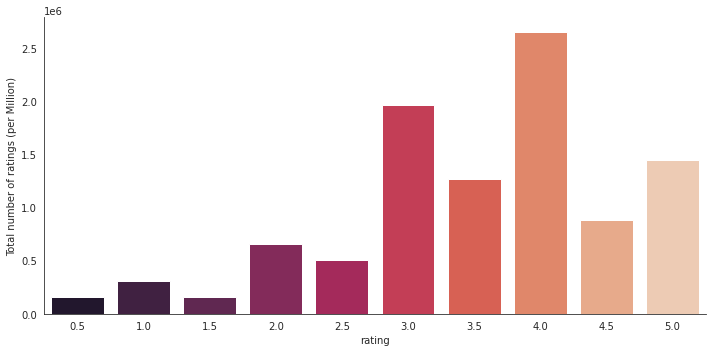

In [ ]:
with sns.axes_style('white'):
  ax = sns.factorplot("rating", data=train, aspect=2.0, kind='count',  palette="rocket")
  ax.set_ylabels("Total number of ratings (per Million)")
  print (f'Average rating in dataset: {np.mean(train["rating"])}')

In [ ]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

Extracting top 10 most popular movies

In [ ]:
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(10)

,rating,rating_counts,popularity
title,,,
"Shawshank Redemption, The (1994)",4.417624,32831,145035.0
Pulp Fiction (1994),4.195097,31697,132972.0
Forrest Gump (1994),4.047216,32383,131061.0
"Silence of the Lambs, The (1991)",4.144172,29444,122021.0
"Matrix, The (1999)",4.154253,29014,120531.5
Star Wars: Episode IV - A New Hope (1977),4.111811,27560,113321.5
Schindler's List (1993),4.247625,24004,101960.0
Fight Club (1999),4.227906,23536,99508.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.146236,22956,95181.0


## Insights for Genres

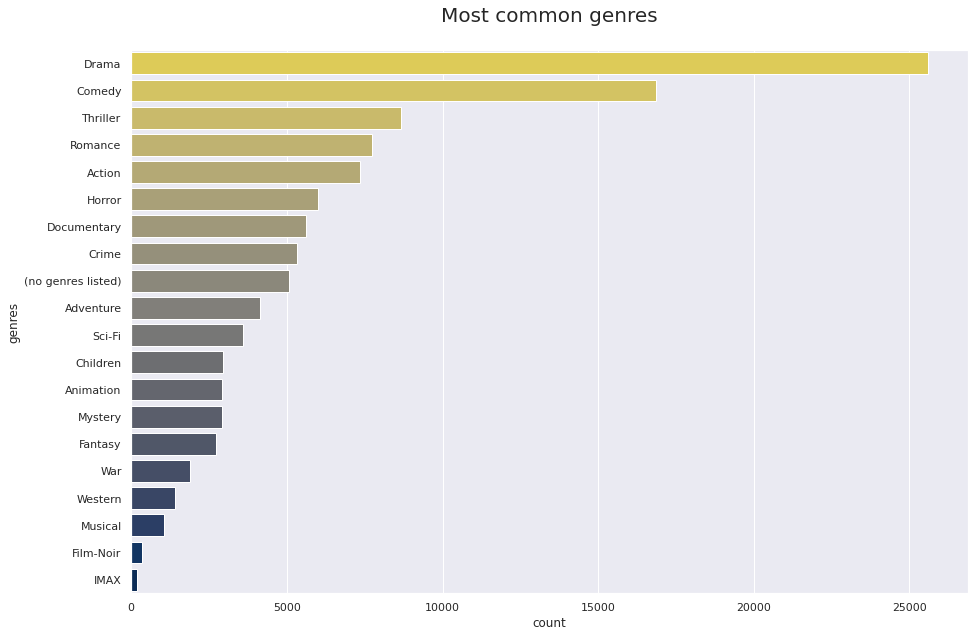

In [44]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='cividis_r')
plt.show()

## Insights for Genres

In [22]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')

Text(0.5, 1.0, 'TOTAL MOVIES RELEASED PER YEAR')

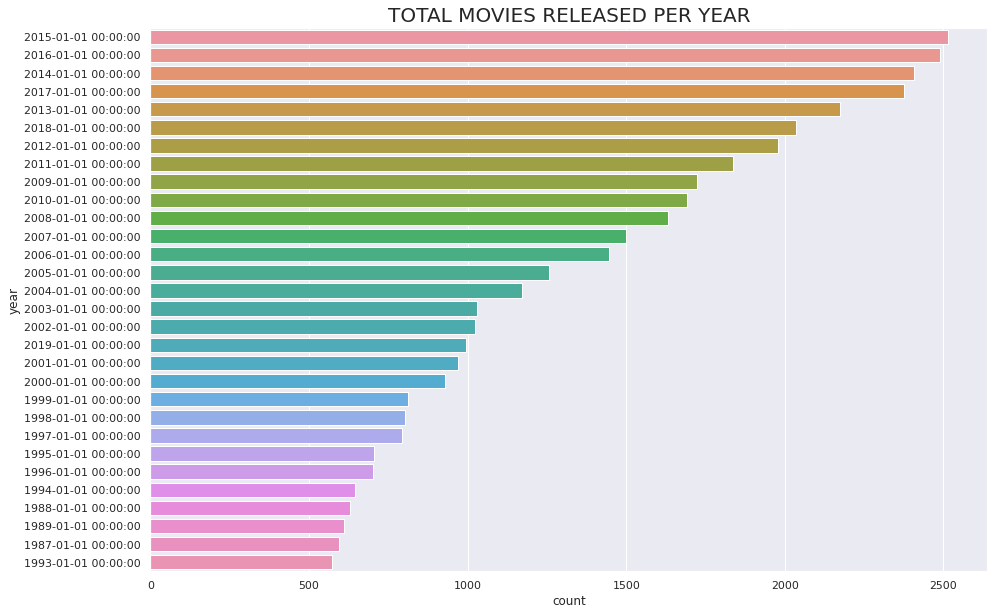

In [26]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=movies['year'], data=movies, order=movies['year'].value_counts().index[0:30])
ax.set_title('TOTAL MOVIES RELEASED PER YEAR', fontsize= 20)

# **DATA VISUALISATION**

<code style="background:red;color:black">

## **4. Data Engineering**</code><a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<code style="background:red;color:black">
When it comes to creating a Machine Learning model, data preprocessing is the first step marking the initiation of the process. Typically, real-world data is incomplete, inconsistent, inaccurate (contains errors or outliers), and often lacks specific attribute values/trends. This is where data preprocessing enters the scenario – it helps to clean, format, and organize the raw data, thereby making it ready-to-go for Machine Learning models.</code>

In [ ]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

###### <a id="five"></a>
# 5. **Modelling**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


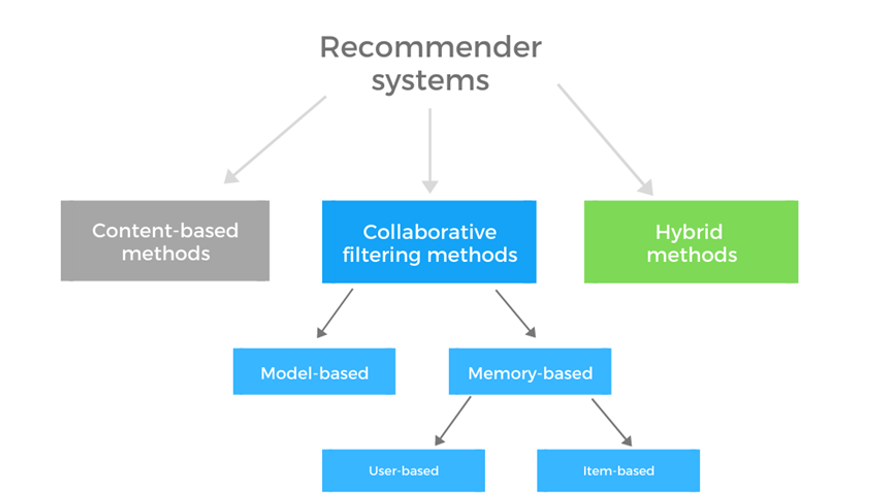

Definations of content, collab- (modelbased,  memory based (user, item )) and  hybrid 

We would be considering two types of recommendation system base filtering:


*   Content-based filtering recommendation 
*   Collaborative-based filtering recommendation



### **Content-based filtering recommendation**

### **Collaborative-based filtering recommendation**

<a href=#cont>Back to Table of Contents</a>


A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing an algorithm that it can use to reason over and learn from those data (Song, Rinsternpart & Shmatikov 2017, pp 587-601).`The logistic regression, support vector model, decision trees, and random forest models were used in this study. The logistic regression model outperforms the other model with a 99.76 percent accuracy score on training data and an 87 percent accuracy score on unseen data.`

In [ ]:
# Reads the data with specicied ratings and loads the data
train_subset = train
reader = Reader(rating_scale=(train_subset ['rating'].min(),train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size = 0.01, random_state = 50)


In [ ]:
param_grid ={'n_epochs': [ 30, 45,50], 
             'init_std_dev' : [0.002,0.005, 0.02], 
             'n_factors' : [200,250, 300, 400],
             'lr_all' : [0.002, 0.005],
             'reg_all' : [0.4, 0.6]}

# Instatiate gridsearch instance
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2)

# Run gridsearch
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
bl = BaselineOnly()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
bl.fit(trainset)

predictions_b = bl.test(testset)

# Compute and print Root Mean Squared Error
r1 = accuracy.rmse(predictions_b, verbose=True)

Estimating biases using als...
RMSE: 0.8673


Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.In machine learning, it is extremely helpful to have a single number to judge a model’s performance, whether it be during training, cross-validation, or monitoring after deployment. Root mean square error is one of the most widely used measures for this. It is a proper scoring rule that is intuitive to understand and compatible with some of the most common statistical assumptions.

**Singular Value Decomposition plus-plus (SVDpp)**

In [ ]:
svdpp = SVDpp(n_epochs = 10, n_factors = 100, init_std_dev = 0.005, random_state=50)

svdpp.fit(trainset)

predictions_svdpp = svdpp.test(testset)
r2 = accuracy.rmse(predictions_svdpp, verbose=True)

RMSE: 0.9387


In [ ]:
# SVD model

svd = SVD(n_epochs = 30, n_factors = 400, init_std_dev = 0.02, random_state=42, lr_all = 0.005, reg_all= 0.4)

trainset, testset = train_test_split(data, test_size = 0.01)

# train and test algorithm.
svd.fit(trainset)

predictions_svd = svd.test(testset)

# Compute and print Root Mean Squared Error
r3 = accuracy.rmse(predictions_svd, verbose=True)

RMSE: 0.9630


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.510207
1,1_4144,3.950315
2,1_5767,3.533096
3,1_6711,3.790345
4,1_7318,2.872373


## 6.   **Model Perfomance**

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

In [ ]:
my_submission = pd.DataFrame({'id': results.Id, 'rating': results.rating})
my_submission.to_csv('submission.csv', index=False)

# 7.   **Model explanation**

###### <a id="eight"></a>
# 8. **References**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

merge genome score relevance and train dataset 

In [ ]:
# scaler = StandardScaler()

# scaler.fit(df_major)

In [ ]:
# scaled_data = scaler.transform(df_major) #all my values will be transfomd to same scale

In [ ]:
# pca = PCA(n_components=2) #2dimensional data
# pca.fit(scaled_data)
# x_pca = pca.transform(scaled_data)

In [ ]:
# #extracting the year from the title
# movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
# #removing the parenthesis
# movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)



In [ ]:
# #remove the year from the title
# movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')

In [ ]:
# #Strip function get rid of the white spaces present
# movies['title'] = movies['title'].apply(lambda x: x.strip())

In [ ]:
# #first in dimension reduction you standardize
# df_major = pd.merge(ratings, movies, on='movieId')

In [ ]:
# df_major.head()

In [ ]:
# df_major.tail()

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

In [ ]:
# import string 
# import re

In [ ]:
# # define a function for extracting the punctuations

# def check_find_punctuations(text):
    
#     # regular expression containing
#     # all punctuation
#     result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
#                         text)
      
#     # form a string
#     string = "".join(result)
      
#     # list of strings return
#     return list(string)
    
# # creating new column name
# # as a punctuation_used and 
# # applying user defined function
# # on each rows of Comments column
# df_major['punctuation_used'] = df_major['title'].apply(
#                          lambda x : check_find_punctuations(x)
#                          )

In [ ]:
# df_major.head()

In [ ]:
# df_major = df_major.drop('punctuation_used', axis=1)
# df_major.head()

In [ ]:
# df_major = df_major.drop('year', axis=1)

In [ ]:
# df_major['title'] = df_major['title'].str.replace(r'[^\w\s]+', '')

In [ ]:
# df_major.tail()

In [ ]:
# # keep last duplicate row
# df_mafor = df_major.drop_duplicates( keep='last')

In [ ]:
# duplicate = df_major[df_major.duplicated()]
# print(duplicate)

### **Data** **engeneering** 

Convert the title to numeric

In [ ]:
# #Convert the title to numeric

# cat_columns = df_major.select_dtypes(['object']).columns
# df_major[cat_columns] = df_major[cat_columns].apply(lambda x: pd.factorize(x)[0])


Create y variable

In [ ]:
# y = df_major[['rating']].astype(int)

Vectorize the data

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # get bag of words features in sparse format
# cv = CountVectorizer(min_df=0., max_df=1.)
# cv_matrix = cv.fit_transform(df_major)

Standardize the data

Dimensionality reduction to 2 dimensions using pca

Dimensionality reduction using T-SNE

now we can transform data into its first two principal components

In [ ]:
!pip install scikit-surprise

In [ ]:
reader = Reader(rating_scale=(1,5))

In [ ]:
train_df = Dataset.load_from_df(df_major[['userId', 'movieId', 'rating']], reader)

In [ ]:
train_set = train_df.build_full_trainset()

In [ ]:
svd= SVD(n_epochs=10, n_factors=100, biased=True, random_state=15, verbose=True) 

In [ ]:
svd.fit(train_set)

In [ ]:
predictions = []
for i, row in test.iterrows():
    prediction_svd= (svd.predict(row.userId, row.movieId))
    pred_svd = prediction_svd[3]
    predictions.append(pred_svd)

In [ ]:
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("output.csv", index=False)

Split the data into train and test

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state = 42)

## **Fit the model**

# New Section

In [ ]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

Model2

In [ ]:
# from sklearn.naive_bayes import GaussianNB

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# mode2 = KNeighborsClassifier(n_neighbors=2)

# # Train the model using the training sets
# mode2.fit(X_train, y_train)

In [ ]:
# mode2.score(X_test, y_test)

In [ ]:

# model2_pred = model2.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# #Calculate the accuracy of the model
# KN_acc = accuracy_score(mode2_pred, y_test)

# #print accuracy
# print("Test accuracy: {:.2f}%".format(model2_pred*100))

CSV

In [ ]:
#  from sklearn.ensemble import RandomForestClassifier

In [ ]:
# clf=RandomForestClassifier()
# clf.fit(X_train,y_train)

In [ ]:
# clf.score(X_test, y_test)

In [ ]:
# from sklearn.mixture import GaussianMixture
# EM = GaussianMixture()
# Em.fit(X_train, y_train)

In [ ]:
# EM.score(X_test, y_test)

In [ ]:
# k = 2

Model

In [ ]:
# km = KMeans(n_clusters=K, random_state=42)
# km.fit(X_train, y_train)
# km.score(X_test, y_test)